In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

# 1. loading data:

In [2]:
data = pd.read_csv('/kaggle/input/saudi-arabia-weather-history/weather-sa-2017-2019-clean.csv')

# 2. input data

In [3]:
data =data.drop('Unnamed: 0',axis=1)
data

,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249018,Jawf,30 April 2019,19:00,2019,4,30,19,0,Passing clouds,32,19,14%,1014.0,-1
249019,Jawf,30 April 2019,20:00,2019,4,30,20,0,Passing clouds,29,9,22%,1015.0,-1
249020,Jawf,30 April 2019,21:00,2019,4,30,21,0,Passing clouds,27,7,24%,1016.0,-1
249021,Jawf,30 April 2019,22:00,2019,4,30,22,0,Clear,26,0,26%,1017.0,16


In [4]:
data.describe()

,year,month,day,hour,minute,temp,wind,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,248951.000000,249023.000000
mean,2017.710007,6.050694,15.691081,12.536890,0.131108,24.722624,12.957104,1015.455355,11.053453
std,0.706113,3.521591,8.787958,6.910254,1.970710,8.880913,8.711619,6.970779,7.053005
min,2017.000000,1.000000,1.000000,1.000000,0.000000,-4.000000,-1.000000,904.000000,-1.000000
25%,2017.000000,3.000000,8.000000,7.000000,0.000000,18.000000,7.000000,1011.000000,5.000000
50%,2018.000000,6.000000,16.000000,13.000000,0.000000,24.000000,11.000000,1016.000000,16.000000
75%,2018.000000,9.000000,23.000000,19.000000,0.000000,31.000000,19.000000,1021.000000,16.000000
max,2019.000000,12.000000,31.000000,24.000000,59.000000,50.000000,163.000000,1101.000000,161.000000


# 3. sample data

In [5]:
m = 5000
np.random.seed(123) #Set the seed
d = data.sample(m, random_state = 2)
dataSet = d.loc[:,["temp" , "barometer"]]
dataSet

,temp,barometer
114855,24,1011.0
130335,23,1018.0
83787,24,1021.0
94971,25,1015.0
200126,16,1022.0
...,...,...
89394,32,1010.0
160523,22,1006.0
102897,34,1011.0
15851,15,1020.0


In [6]:
dataSet.describe()

,temp,barometer
count,5000.000000,5000.000000
mean,24.597000,1015.515400
std,8.760225,7.035287
min,1.000000,992.000000
25%,18.000000,1011.000000
50%,24.000000,1016.000000
75%,31.000000,1021.000000
max,48.000000,1030.000000


# 4. Visualizing data

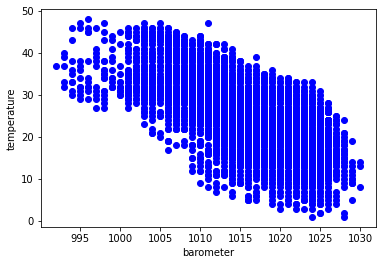

In [7]:
plt.scatter(dataSet["barometer"] , dataSet["temp"], color = "b")
plt.xlabel("barometer")
plt.ylabel("temperature")
plt.show()

# 5. Splitting data for Training and Testing

In [8]:
train = dataSet[:(int((len(dataSet)*0.8)))]
test = dataSet[(int((len(dataSet)*0.8))):]

# 6. Modeling

In [9]:
lin_reg = linear_model.LinearRegression()
trainX = np.array(train[["barometer"]])
trainY = np.array(train[["temp"]])
lin_reg.fit(trainX,trainY)

print("Coefficients: ", lin_reg.coef_)
print("Intercept: ",lin_reg.intercept_)

Coefficients:  [[-0.82052723]]
Intercept:  [857.85245541]


# 7. visualizing Regression Fit

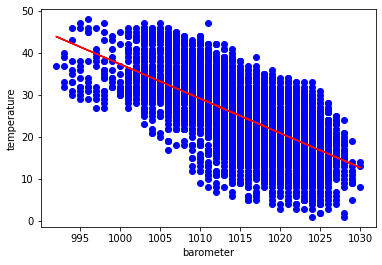

In [10]:
plt.scatter(dataSet["barometer"] , dataSet["temp"], color = "b")
plt.plot(trainX,lin_reg.coef_*trainX + lin_reg.intercept_, '-r')
plt.xlabel("barometer")
plt.ylabel("temperature")
plt.show()

# 8. Testing

In [11]:
testX = np.array(test[["barometer"]])
testY = np.array(test[["temp"]])
testY_pred_lin = lin_reg.predict(testX)

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(testY_pred_lin - testY)))
print("Mean sum of squares error (MSE): %.2f" % np.mean((testY_pred_lin - testY) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((testY_pred_lin - testY) ** 2)))

Mean absolute error (MAE): 5.30
Mean sum of squares error (MSE): 42.99
Root mean square error (RMSE): 6.56



# Batch Gradient Descent 

In [12]:
x = train['barometer']
y = train['temp']

x = (x - x.mean()) / x.std()
x= np.c_[np.ones(x.shape[0]), x] 

xtest = test['barometer']
ytest = test['temp']

In [13]:
#GRADIENT DESCENT METHOD
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    #Plot the cost function
    plt.title('Cost Function ')
    plt.xlabel('Num of iterations')
    plt.ylabel('Cost')
    plt.plot(past_costs)
    plt.show()
    
    #Plot the fit function
    plt.title('Fit Function ')
    plt.scatter(train["barometer"] , train["temp"], color = "b")
    plt.plot(train["barometer"], prediction, '-r')
    plt.xlabel("barometer")
    plt.ylabel("temperature")
    plt.show()
        
    return past_thetas, past_costs

In [14]:
def gradient_descent_Test(xtest,ytest):
    
    xtest = (xtest - xtest.mean()) / xtest.std()
    xtest = np.c_[np.ones(xtest.shape[0]), xtest]

    prediction2 = np.dot(xtest, theta)
    print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(prediction2 - ytest)))
    print("Mean sum of squares error (MSE): %.2f" % np.mean((prediction2 - ytest) ** 2))
    print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((prediction2 - ytest) ** 2)))

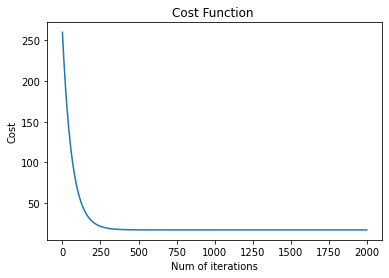

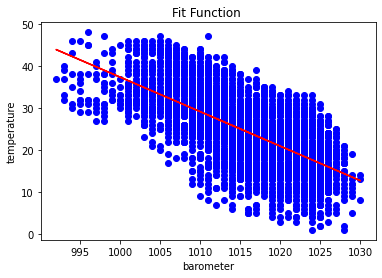


Gradient Descent:  24.586747479042245 -5.80251876244099
Mean absolute error (MAE): 5.30
Mean sum of squares error (MSE): 42.90
Root mean square error (RMSE): 6.55


In [15]:
alpha = 0.01 #learning rate
iterations = 2000 #number of iterations
theta = np.random.rand(2) #random values to start

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

print("\nGradient Descent: ",theta[0], theta[1])
gradient_descent_Test(xtest,ytest)

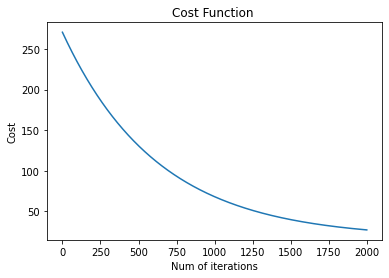

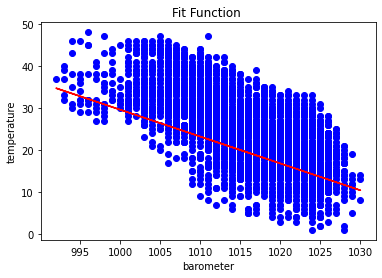


Gradient Descent:  19.67171961077958 -4.520010277836203
Mean absolute error (MAE): 6.84
Mean sum of squares error (MSE): 69.81
Root mean square error (RMSE): 8.36


In [16]:
alpha = 0.001 #learning rate
iterations = 2000 #number of iterations
theta = np.random.rand(2) #random values to start

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

print("\nGradient Descent: ",theta[0], theta[1])
gradient_descent_Test(xtest,ytest)

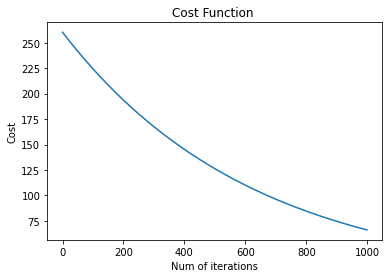

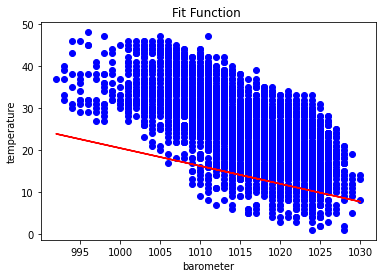


Gradient Descent:  13.865922383573842 -3.005501077595125
Mean absolute error (MAE): 11.18
Mean sum of squares error (MSE): 168.07
Root mean square error (RMSE): 12.96


In [17]:
alpha = 0.001 #learning rate
iterations = 1000 #number of iterations
theta = np.random.rand(2) #random values to start

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

print("\nGradient Descent: ",theta[0], theta[1])
gradient_descent_Test(xtest,ytest)

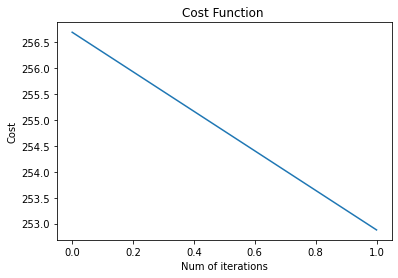

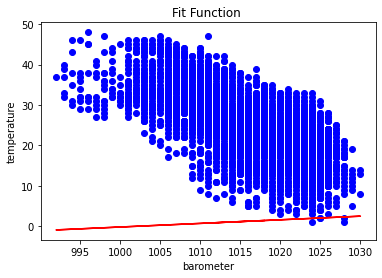


Gradient Descent:  1.3569491881191584 0.5814730844197954
Mean absolute error (MAE): 23.28
Mean sum of squares error (MSE): 628.64
Root mean square error (RMSE): 25.07


In [18]:
alpha = 0.01 #learning rate
iterations = 2 #number of iterations
theta = np.random.rand(2) #random values to start

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

print("\nGradient Descent: ",theta[0], theta[1])
gradient_descent_Test(xtest,ytest)

# Polynomial Regression 

In [19]:
def PolynomialRegression(X,y,degree):
    poly_features = PolynomialFeatures(degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    X[0]

    lin_reg2 = linear_model.LinearRegression()
    lin_reg2.fit(X_poly, y)
    lin_reg2.intercept_, lin_reg2.coef_

    X_new = np.linspace(995, 1030, 100).reshape(100, 1)
    X_new_poly = poly_features.transform(X_new)
    y_new = lin_reg2.predict(X_new_poly)
    plt.plot(X, y, "b.")
    plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
    plt.xlabel("barometer")
    plt.ylabel("temperature")
    plt.legend(loc="upper left")
    plt.axis([995,1030, 0, 50])
    plt.show()
    
    testX_poly = poly_features.transform(testX)
    testY_poly = lin_reg2.predict(testX_poly)
    
    return testY_poly

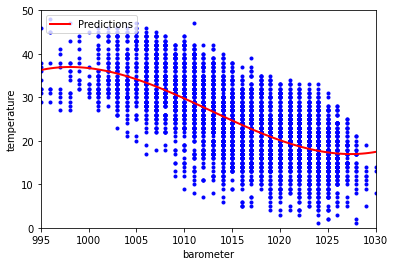

Mean absolute error (MAE): 5.26
Mean sum of squares error (MSSE): 42.29
Root mean square error (RMSE): 6.50


In [20]:
testY_poly = PolynomialRegression(trainX,trainY,3)

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(testY_poly - testY)))
print("Mean sum of squares error (MSSE): %.2f" % np.mean((testY_poly - testY) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((testY_poly - testY) ** 2)))

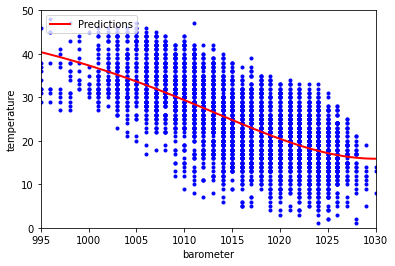

Mean absolute error (MAE): 5.28
Mean sum of squares error (MSSE): 42.60
Root mean square error (RMSE): 6.53


In [21]:
testY_poly = PolynomialRegression(trainX,trainY,100)

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(testY_poly - testY)))
print("Mean sum of squares error (MSSE): %.2f" % np.mean((testY_poly - testY) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((testY_poly - testY) ** 2)))

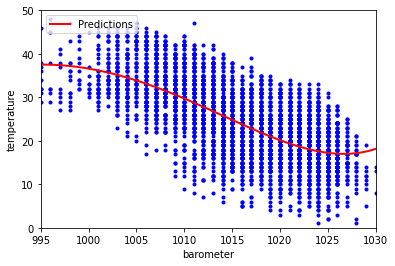

Mean absolute error (MAE): 5.27
Mean sum of squares error (MSSE): 42.46
Root mean square error (RMSE): 6.52


In [22]:
testY_poly = PolynomialRegression(trainX,trainY,30)

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(testY_poly - testY)))
print("Mean sum of squares error (MSSE): %.2f" % np.mean((testY_poly - testY) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((testY_poly - testY) ** 2)))